# 2. Correlación #

La __Covarianza__ mide la relación lineal entre dos variables. __Positiva__: dos variables tienden a variar en la misma dirección. __Negativa__: dos variables tienden a variar en la dirección opuesta. __Cero__: dos variables no varían juntas.

La __Correlación__ estadística constituye una técnica estadística que nos indica si dos variables están relacionadas o no. Es __perfecta__ cuando es __igual a 1__. __No hay correlación__ cuando es __igual a 0__. Es __perfecta negativa__ cuando es __igual a -1__ e indica que una variable va para un lado y la otra para el otro.

__Panda.cor__ dice que hay correlación cuando es lineal; si no es lineal, dice que no hay correlación (puede existir una correlación no lineal).

*La correlación no implica causa*: una alta correlación entre dos variables aleatorias solo significa que están asociadas entre sí, pero su relación no es necesariamente de naturaleza causal. La única forma de probar la causalidad es con experimentos controlados, donde eliminamos las variables externas y aislamos los efectos de las dos variables en cuestión.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

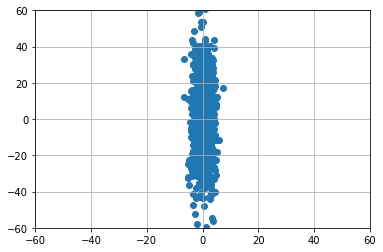

In [2]:
n = 1000
sigma_1 = 2
sigma_2 = 20
x = np.random.normal(size = n, scale = sigma_1)
y = np.random.normal(size = n, scale = sigma_2)

# Graficamos
plt.scatter(x, y) # Dispersión
plt.grid() # Cuadrícula
plt.xlim([-60,60])
plt.ylim([-60,60])
plt.show()

In [3]:
cov = np.sum((x - x.mean())*(y - y.mean()))/x.size
print(cov)

-0.46442343595228835


La __covarianza__, sin embargo, tiene un pequeño problema: depende de la escala de nuestros datos. Entonces, para deshacernos de la escala, se puede definir la __correlación__, que no es otra cosa que la covarianza dividida la desviación estándar de cada variable aleatoria.

In [4]:
corr = cov/(x.std()*y.std())
print(corr)

-0.011811138840598048


# 2.1 Relación lineal #

Existe una relación lineal entre  X  e  Y , es decir, podemos aproximar  Y=aX+b , donde  a  y  b  son la pendiente y la ordenada al origen

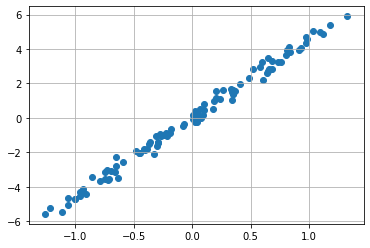

In [5]:
n = 100
x = np.linspace(-1,1,n) + 0.25*np.random.normal(size = n)
y = 4.5*x + 0.25*np.random.normal(size = n)

# Graficamos
plt.scatter(x, y)
plt.grid()
plt.show()

In [6]:
# La covarianza nos da:

In [7]:
cov = np.sum((x - x.mean())*(y - y.mean()))/x.size
print(cov)

1.925799375304578


In [8]:
corr = cov/(x.std()*y.std())
corr

0.9960602399029276

Ahora, en cambio, __el valor es cercano a uno__, indicando una __relación lineal creciente__ entre ambas variables.

Probar cambiando la pendiente de la función lineal (el número que multiplica a x en y = ...) y mirar qué pasa. ¿Qué pasa si la pendiente es negativa? 

__Conclusiones:__
La covarianza es una medida de la variación conjunta de dos variables. Pero tiene un problema: depende de la escala.
Para "deshacernos" de la escala, definimos la correlación, que es simplemente la covarianza dividida por el producto de la desviación estándar de cada variable. Para pensar: ¿por qué la desviación estándar está asociada a la escala de una variable?
La correlación es un valor entre -1 y 1. La correlación toma un valor cercano a uno cuando hay una relación lineal creciente entre las variables, cero cuando no hay relación y -1 cuando hay una relación lineal decreciente.
Esta correlación tiene un nombre particular: Correlación de Pearson.

# 2.2 Covarianza y Correlación con NumPy #

NumPy ya tiene incorporadas funciones que calculan la covarianza y la correlación entre dos variables. La única diferencia es que, en lugar de devolver un único valor, devuelve cuatro valores, que corresponden a la covarianza/correlación entre  X  con  X ,  X  con  Y ,  Y  con  X , e  Y  con  Y

*¿Por qué, en la correlación, algunos valores son exactamente uno (1.)?:*

-*Si r = 1, existe una correlación positiva perfecta.*

-*Si 0 < r < 1, existe una correlación positiva.*

-*Si r = 0, no existe relación lineal.*

In [9]:
np.cov([x,y])

array([[0.42817763, 1.94525189],
       [1.94525189, 8.90751387]])

In [10]:
np.corrcoef([x,y])

array([[1.        , 0.99606024],
       [0.99606024, 1.        ]])

# 2.3 Relación No-Lineal entre variables #

¿Qué ocurre cuando la __relación no es lineal__ entre las variables?

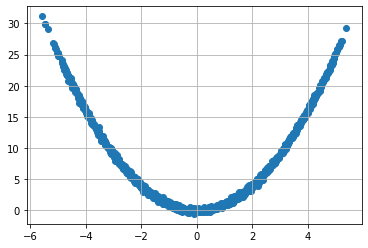

In [11]:
n = 1000
x = np.linspace(-5,5,n) + 0.25*np.random.normal(size = n)
y = x**2 + 0.25*np.random.normal(size = n)

# Graficamos
plt.scatter(x, y)
plt.grid()
plt.show()

La covarianza nos da:

In [12]:
cov = np.sum((x - x.mean())*(y - y.mean()))/x.size
print(cov)

-0.26366888600456423


In [13]:
corr = cov/(x.std()*y.std())
corr

-0.011807924382201827

Notar que la correlación de un valor alrededor de cero, indicando que no hay una correlación entre ambas variables. Pero esto NO indica que no hay una relación entre esas variables, solamente nos dice que no es lineal. Por eso es muy importante graficar.

Para tratar con relaciones no lineal entre variables, existen otros tipos de correlaciones. La que vimos se llama Correlación de Pearson, que es la más famosa. Pero también existen otras, Spearman y Kendall, que son muy útiles cuando existe una relación no lineal entre variables.

# 3. Correlación en Pandas #

Lo aplicamos en un conjunto de datos. Volvemos a usar el Iris Dataset.

In [14]:
import pandas as pd

In [15]:
data = pd.read_csv('Data\DS_Bitácora_04_Iris.csv')
data.drop(columns = 'Id', inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# Para obtener las correlaciones entre las distintas variables, tenemos que hacer:

In [17]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


__Para responder:__ ¿Cuáles variables están correlacionadas entre sí?¿Por qué los elementos de la diagonal son exactamente uno (1.0)?

Ancho del Pétalo y Longitud del Cépalo - Y la otra que da 0.96 // Porque tienen una correlación positiva perfecta.